<a href="https://colab.research.google.com/github/ins-uni-bonn/mllab-project-marcolparnell/blob/main/neural_networks_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_tuner
from tensorflow import keras
import tensorflow.keras.layers as layers
from tensorflow.keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
# from read_cifar import load_cifar
import numpy as np
import keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.3 MB/s eta 0:00:00


In [2]:
from read_cifar import load_cifar
training_data, test_data = load_cifar()

In [3]:
# here we normalzie the data
training_data["data"] = training_data["data"] / 255

mean_per_channel = np.mean(training_data["data"], axis=(0, 1, 2))
std_per_channel = np.std(training_data["data"], axis=(0, 1, 2))
training_data["data"] = (training_data["data"] - mean_per_channel)/std_per_channel

test_data["data"] = test_data["data"] / 255
mean_per_channel = np.mean(test_data["data"], axis=(0, 1, 2))
std_per_channel = np.std(test_data["data"], axis=(0, 1, 2))
test_data["data"] = (test_data["data"] - mean_per_channel)/std_per_channel

In [ ]:
# here we try a random neural network
cifar_cnn = keras.Sequential()


cifar_cnn.add(layers.Input(shape=(32,32,3)))

# # # Data augmentation
cifar_cnn.add(layers.RandomFlip(mode="horizontal_and_vertical"))
cifar_cnn.add(layers.RandomRotation(0.05))

# First conv block
cifar_cnn.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cifar_cnn.add(layers.Conv2D(40, (3, 3), activation='relu', padding='same'))
cifar_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cifar_cnn.add(layers.Dropout(0.2))

# # Second conv block
cifar_cnn.add(layers.Conv2D(78, (3, 3), activation='relu', padding='same'))
cifar_cnn.add(layers.BatchNormalization())
cifar_cnn.add(layers.Conv2D(68, (3, 3), activation='relu', padding='same'))
cifar_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cifar_cnn.add(layers.Dropout(0.2))

# Fully connected layers
cifar_cnn.add(layers.Flatten())
cifar_cnn.add(layers.Dense(256, activation='relu'))
cifar_cnn.add(layers.Dropout(0.2))
cifar_cnn.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

cifar_cnn.summary()

callbac_cifra_cnn = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)

cifar_cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history_cifar_cnn = cifar_cnn.fit(
    training_data["data"],
    training_data["labels"],
    batch_size = 1024,
    epochs=200,
    validation_split=0.1,
    callbacks=[callbac_cifra_cnn]
    )

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_8 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 40)     │         8,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 16, 16, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 78)     │        28,158 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 78)     │           312 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 68)     │        47,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 8, 8, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     1,114,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,564 (4.59 MB)

 Trainable params: 1,202,408 (4.59 MB)

 Non-trainable params: 156 (624.00 B)

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.1456 - loss: 3.7692 - val_accuracy: 0.2226 - val_loss: 2.2557
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - accuracy: 0.2423 - loss: 2.0739 - val_accuracy: 0.2690 - val_loss: 2.1807
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.3195 - loss: 1.8599 - val_accuracy: 0.3548 - val_loss: 2.0922
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.3507 - loss: 1.7195 - val_accuracy: 0.4120 - val_loss: 1.9888
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.3853 - loss: 1.6389 - val_accuracy: 0.4500 - val_loss: 1.8545
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.4138 - loss: 1.5674 - val_accuracy: 0.4570 - val_loss: 1.7624
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.4466 - loss: 1.5043 - val_accuracy: 0.5114 - val_loss: 1.6326
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.4634 - loss: 1.4543 - va

In [ ]:
cifar_cnn.evaluate(test_data["data"], test_data["labels"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7724 - loss: 0.6834


[0.6845255494117737, 0.7735000252723694]

In [ ]:
# hypertuning the parameters, first iteration
def build_cnn(hp):
  model = keras.Sequential()

  model.add(layers.Input(shape=(32,32,3)))

  # Data augmentation
  if hp.Boolean("aug"):
    model.add(layers.RandomFlip(mode="horizontal_and_vertical"))
    model.add(layers.RandomRotation(0.15))
    model.add(layers.RandomZoom(0.15, 0.15))

  # First conv block
  model.add(layers.Conv2D(filters=hp.Int("conv_1", min_value=16, max_value = 48, step = 8), kernel_size = (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(filters=hp.Int("conv_2", min_value=16, max_value = 48, step = 8), kernel_size = (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  if hp.Boolean("dropout_1"):
    model.add(layers.Dropout(rate = hp.Float("dropout_float_1", min_value=0.1, max_value=0.3, step=0.05)))

  if hp.Boolean("conv_2"):
  # # Second conv block
    model.add(layers.Conv2D(filters=hp.Int("conv_3", min_value=30, max_value = 80, step = 8), kernel_size = (3, 3), activation='relu', padding='same'))
    if hp.Boolean("batch_norm"):
      model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=hp.Int("conv_4", min_value=20, max_value = 80, step = 8), kernel_size = (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    if hp.Boolean("dropout_2") :
      model.add(layers.Dropout(rate = hp.Float("dropout_float_2", min_value=0.1, max_value=0.3, step=0.05)))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(units = hp.Int("dense_1", min_value=64, max_value=512, step=64), activation='relu'))
  model.add(layers.Dropout(rate = hp.Float("dropout_float_3", min_value=0.1, max_value=0.3, step=0.05)))
  model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

  model.summary()

  callback_model = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

  model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

  return model

In [ ]:
build_cnn(keras_tuner.HyperParameters())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 30)     │         4,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 20)     │         5,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,172 (371.77 KB)

 Trainable params: 95,172 (371.77 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential_2, built=True>

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel = build_cnn,
    objective = "val_accuracy",
    max_trials = 20,
    executions_per_trial = 1,
    overwrite = True,
    directory = "cnn_model",
    project_name = "cnn_v1"
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 30)     │         4,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 20)     │         5,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,172 (371.77 KB)

 Trainable params: 95,172 (371.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
aug (Boolean)
{'default': False, 'conditions': []}
conv_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 48, 'step': 8, 'sampling': 'linear'}
conv_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 48, 'step': 8, 'sampling': 'linear'}
dropout_1 (Boolean)
{'default': False, 'conditions': []}
conv_3 (Int)
{'default': None, 'conditions': [], 'min_value': 30, 'max_value': 80, 'step': 8, 'sampling': 'linear'}
batch_norm (Boolean)
{'default': False, 'conditions': []}
conv_4 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 80, 'step': 8, 'sampling': 'linear'}
dropout_2 (Boolean)
{'default': False, 'conditions': []}
dense_1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
dropout_float_3 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.05, 'sampling': 'linear'}


In [ ]:
# test / validate split
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    training_data["data"], training_data["labels"], test_size=0.2, shuffle=True
)

In [ ]:
# search for the best model
tuner.search(x_train, y_train, epochs=15, validation_data = (x_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Trial 23 Complete [00h 02m 32s]
val_accuracy: 0.5507000088691711

Best val_accuracy So Far: 0.7664999961853027
Total elapsed time: 00h 51m 59s

Search: Running Trial #24

Value             |Best Value So Far |Hyperparameter
True              |False             |aug
48                |24                |conv_1
24                |24                |conv_2
False             |True              |dropout_1
46                |46                |conv_3
False             |True              |batch_norm
60                |36                |conv_4
True              |True              |dropout_2
192               |192               |dense_1
0.15              |0.2               |dropout_float_3
0.2               |0.1               |dropout_float_2
0.15              |0.2               |dropout_float_1



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 24)     │        10,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 46)     │         9,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 60)     │        24,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │       737,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 786,020 (3.00 MB)

 Trainable params: 786,020 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2999 - loss: 1.9089 - val_accuracy: 0.4392 - val_loss: 1.5326
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4513 - loss: 1.5284 - val_accuracy: 0.5162 - val_loss: 1.3369
Epoch 3/15


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/cnn_model /content/drive/MyDrive/

In [ ]:
models = tuner.get_best_models()
best_model_v2 = models[0]
best_model_v2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 46)     │         9,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 46)     │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 36)     │        14,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │       442,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,476 (1.81 MB)

 Trainable params: 475,384 (1.81 MB)

 Non-trainable params: 92 (368.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 46)     │         9,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 46)     │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 36)     │        14,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │       442,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,476 (1.81 MB)

 Trainable params: 475,384 (1.81 MB)

 Non-trainable params: 92 (368.00 B)

In [ ]:
best_model_v2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 46)     │         9,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 46)     │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 36)     │        14,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │       442,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,476 (1.81 MB)

 Trainable params: 475,384 (1.81 MB)

 Non-trainable params: 92 (368.00 B)

In [ ]:
callback_model = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)


history_cifar_cnn = best_model.fit(
    training_data["data"],
    training_data["labels"],
    batch_size = 1024,
    epochs=20,
    validation_split=0.1,
    callbacks=[callback_model]
    )

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 349ms/step - accuracy: 0.8219 - loss: 0.5122 - val_accuracy: 0.8918 - val_loss: 0.3360
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8444 - loss: 0.4451 - val_accuracy: 0.8892 - val_loss: 0.3434
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8471 - loss: 0.4397 - val_accuracy: 0.8826 - val_loss: 0.3475
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8563 - loss: 0.4124 - val_accuracy: 0.8856 - val_loss: 0.3455
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8616 - loss: 0.3925 - val_accuracy: 0.8844 - val_loss: 0.3472
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8696 - loss: 0.3682 - val_accuracy: 0.8810 - val_loss: 0.3541
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8707 - loss: 0.3626 - val_accuracy: 0.8808 - val_loss: 0.3571
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8766 - loss: 0.3456 - val_accuracy: 0.8784 

**The above code was executed few times giving two following models**:
First
model: {'aug': False,'conv_1': 24, 'conv_2': 40, 'dropout_1': True, 'conv_3': 78, 'batch_norm': False, 'conv_4': 68, 'dropout_2': True, 'dense_1': 128, 'dropout_float_3': 0.1, 'dropout_float_1': 0.25, 'dropout_float_2': 0.1}

Second model:
{'aug': False,
 'conv_1': 24,
 'conv_2': 24,
 'dropout_1': True,
 'conv_3': 46,
 'batch_norm': True,
 'conv_4': 36,
 'dropout_2': True,
 'dense_1': 192,
 'dropout_float_3': 0.2,
 'dropout_float_2': 0.1,
 'dropout_float_1': 0.2}

In [ ]:
# hyperparameters of the first model
tuner.get_best_hyperparameters(num_trials=1)[0].values


{'aug': False,
 'conv_1': 24,
 'conv_2': 40,
 'dropout_1': True,
 'conv_3': 78,
 'batch_norm': False,
 'conv_4': 68,
 'dropout_2': True,
 'dense_1': 128,
 'dropout_float_3': 0.1,
 'dropout_float_1': 0.25,
 'dropout_float_2': 0.1}

{'aug': False,
 'conv_1': 24,
 'conv_2': 40,
 'dropout_1': True,
 'conv_3': 78,
 'batch_norm': False,
 'conv_4': 68,
 'dropout_2': True,
 'dense_1': 128,
 'dropout_float_3': 0.1,
 'dropout_float_1': 0.25,
 'dropout_float_2': 0.1}

In [ ]:
tuner.get_best_hyperparameters(num_trials=1)[0].values

{'aug': False,
 'conv_1': 24,
 'conv_2': 24,
 'dropout_1': True,
 'conv_3': 46,
 'batch_norm': True,
 'conv_4': 36,
 'dropout_2': True,
 'dense_1': 192,
 'dropout_float_3': 0.2,
 'dropout_float_2': 0.1,
 'dropout_float_1': 0.2}

We should experiment on the models that are above. These ones seem to perform the best.

In [ ]:
best_model_v2.save('cnn_model/best_models/best_model_v2.keras')

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)
model = build_cnn(best_hps[0])
model.fit(training_data["data"], training_data["labels"], validation_split=0.2, epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 24)     │         5,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 46)     │         9,982 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 46)     │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 36)     │        14,940 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 192)            │       442,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,476 (1.81 MB)

 Trainable params: 475,384 (1.81 MB)

 Non-trainable params: 92 (368.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3571 - loss: 1.7816 - val_accuracy: 0.6111 - val_loss: 1.0876
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5912 - loss: 1.1449 - val_accuracy: 0.6570 - val_loss: 0.9651
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6478 - loss: 0.9845 - val_accuracy: 0.6978 - val_loss: 0.8447
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6842 - loss: 0.8827 - val_accuracy: 0.7123 - val_loss: 0.8337
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7123 - loss: 0.8196 - val_accuracy: 0.7329 - val_loss: 0.7612
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7272 - loss: 0.7663 - val_accuracy: 0.7180 - val_loss: 0.8328
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7435 - loss: 0.7200 - val_accuracy: 0.7377 - val_loss: 0.7624
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7599 - loss: 0.6793

In [ ]:
model.evaluate(test_data["data"], test_data["labels"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7694 - loss: 0.7893


[0.7824198603630066, 0.7633000016212463]

In [ ]:
# after a first run of hypertuning we constrain the hyperparameter space to find the best model
# hypertuning the parameters
def build_cnn_constraint(hp):
  model = keras.Sequential()

  model.add(layers.Input(shape=(32,32,3)))

  # First conv block
  model.add(layers.Conv2D(filters=hp.Int("conv_1", min_value=20, max_value = 32, step = 4), kernel_size = (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(filters=hp.Int("conv_2", min_value=20, max_value = 50, step = 10), kernel_size = (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  # if hp.Boolean("dropout_1"):
  model.add(layers.Dropout(rate = hp.Float("dropout_float_1", min_value=0.1, max_value=0.3, step=0.05)))


  # # Second conv block
  model.add(layers.Conv2D(filters=hp.Int("conv_3", min_value=30, max_value = 80, step = 10), kernel_size = (3, 3), activation='relu', padding='same'))
  if hp.Boolean("batch_norm"):
    model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(filters=hp.Int("conv_4", min_value=30, max_value = 80, step = 10), kernel_size = (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Dropout(rate = hp.Float("dropout_float_2", min_value=0.1, max_value=0.3, step=0.05)))

  # Fully connected layers
  model.add(layers.Flatten())
  model.add(layers.Dense(units = hp.Int("dense_1", min_value=96, max_value=256, step=34), activation='relu'))
  model.add(layers.Dropout(rate = hp.Float("dropout_float_3", min_value=0.1, max_value=0.3, step=0.05)))
  model.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

  model.summary()

  callback_model = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4)

  model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

  return model

In [ ]:
build_cnn_constraint(keras_tuner.HyperParameters())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 30)     │         5,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │       184,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,126 (793.46 KB)

 Trainable params: 203,126 (793.46 KB)

 Non-trainable params: 0 (0.00 B)

<Sequential name=sequential_1, built=True>

In [ ]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel = build_cnn_constraint,
    objective = "val_accuracy",
    max_trials = 30,
    executions_per_trial = 1,
    overwrite = True,
    directory = "cnn_model",
    project_name = "cnn_v2"
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 20)     │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 30)     │         5,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 30)     │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │       184,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,126 (793.46 KB)

 Trainable params: 203,126 (793.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.search(x_train, y_train, epochs=12, validation_data = (x_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Trial 30 Complete [00h 01m 47s]
val_accuracy: 0.7731000185012817

Best val_accuracy So Far: 0.7829999923706055
Total elapsed time: 00h 47m 23s


The model obtained after second round of hypertuning doesn't deliver better result, so we opted for one the model obtained in the first round.

In [6]:
# best model

# here we try a random neural network
cifar_cnn = keras.Sequential()


cifar_cnn.add(layers.Input(shape=(32,32,3)))


# First conv block
cifar_cnn.add(layers.Conv2D(24, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cifar_cnn.add(layers.Conv2D(40, (3, 3), activation='relu', padding='same'))
cifar_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cifar_cnn.add(layers.Dropout(0.2))

# # Second conv block
cifar_cnn.add(layers.Conv2D(78, (3, 3), activation='relu', padding='same'))
cifar_cnn.add(layers.BatchNormalization())
cifar_cnn.add(layers.Conv2D(68, (3, 3), activation='relu', padding='same'))
cifar_cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cifar_cnn.add(layers.Dropout(0.2))

# Fully connected layers
cifar_cnn.add(layers.Flatten())
cifar_cnn.add(layers.Dense(256, activation='relu'))
cifar_cnn.add(layers.Dropout(0.2))
cifar_cnn.add(layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

cifar_cnn.summary()

callbac_cifra_cnn = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

cifar_cnn.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history_cifar_cnn = cifar_cnn.fit(
    training_data["data"],
    training_data["labels"],
    batch_size = 1024,
    epochs=200,
    validation_split=0.1,
    callbacks=[callbac_cifra_cnn]
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 40)     │         8,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 78)     │        28,158 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 78)     │           312 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 68)     │        47,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 68)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,114,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,564 (4.59 MB)

 Trainable params: 1,202,408 (4.59 MB)

 Non-trainable params: 156 (624.00 B)

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 189ms/step - accuracy: 0.1508 - loss: 3.6173 - val_accuracy: 0.2230 - val_loss: 2.2627
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.2499 - loss: 2.0266 - val_accuracy: 0.3424 - val_loss: 2.1966
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.3640 - loss: 1.7225 - val_accuracy: 0.4272 - val_loss: 2.0450
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.4353 - loss: 1.5115 - val_accuracy: 0.5180 - val_loss: 1.8980
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4953 - loss: 1.3696 - val_accuracy: 0.5564 - val_loss: 1.7456
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5326 - loss: 1.2803 - val_accuracy: 0.5916 - val_loss: 1.5695
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5667 - loss: 1.1907 - val_accuracy: 0.6256 - val_loss: 1.4125
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5914 - loss: 1.1255 - val_accuracy: 

In [7]:
cifar_cnn.evaluate(test_data["data"], test_data["labels"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8019 - loss: 0.6319


[0.6293655037879944, 0.8019999861717224]

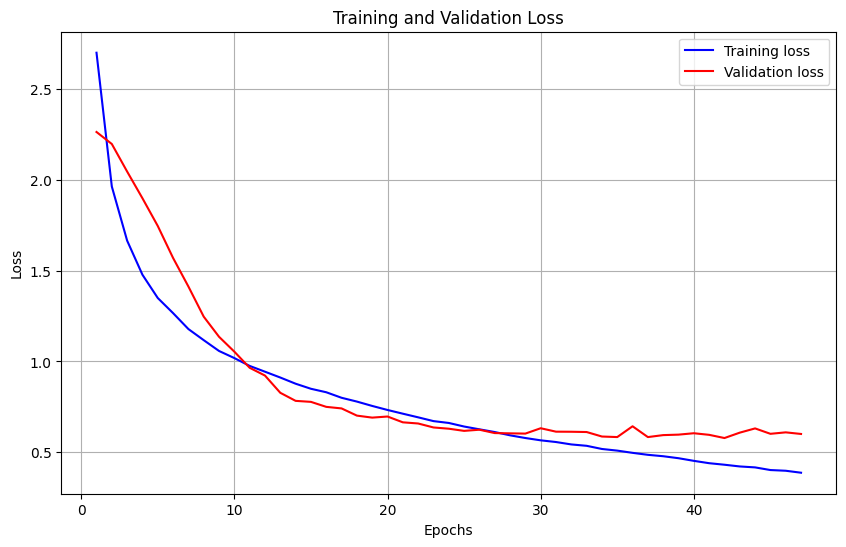

In [9]:
import matplotlib.pyplot as plt
train_loss = history_cifar_cnn.history['loss']
val_loss = history_cifar_cnn.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()